In [1]:
import numpy as np
import pandas as pd
listings = pd.read_csv("listings.csv")

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,43686,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,43686,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.46
2,25428,https://www.airbnb.com/rooms/25428,20190808195507,43686,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.16
3,27886,https://www.airbnb.com/rooms/27886,20190808195507,43686,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.11
4,28871,https://www.airbnb.com/rooms/28871,20190808195507,43686,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,...,f,f,moderate,f,f,3,0,3,0,2.59


In [3]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [4]:
df = listings

As there are over hundred columns, probably breaking down in two portions will be hlpful to see the all the column names carefully.

In [5]:
df.iloc[:, 0:50].columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
df.iloc[:, 50:].columns

It will be helpful to have a look on the datatypes of the columns

In [7]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                      int64
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

Looks like there are lots of ints floats and objects. Ints and floats are easier to deal with but what about objects? We will see in a bit. There might be lots of missing values or null values. So, just checking wit some random columns, how much missing they might have.

In [8]:
df["smart_location"].count()

20677

In [9]:
df["reviews_per_month"].count()

18084

So, not every column has all the values. There are missing values which is very normal. In mist cases we have to deal with missing values. Here I want to get rid of the columns that have 70% or more null values. Because those features won't be useful. 

In [10]:
df1 = df[[c for c in df if df[c].count() / len(df) >= 0.3]]

In [255]:
df1

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,43686,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,https://a0.muscache.com/im/pictures/10272854/8...,3159,https://www.airbnb.com/users/show/3159,Daniel,39715.0,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,1.00,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36575,4.94142,f,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",59,200.0,60.0,1,20,3,15,3,3,15,15,3.0,15.0,today,t,8,18,43,89,43686,267,30,39902.0,43682.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,43686,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,NaN,"No curfew, free entrance 27/7 with your own ke...",This studio/room takes entire floor and has it...,https://a0.muscache.com/im/pictures/69979664/3...,59484,https://www.airbnb.com/users/show/59484,Alexander,40149.0,"Amsterdam, Noord-Holland, The Netherlands",Secondary phone nr. + (Phone number hidden by ...,within an hour,1.00,f,https://a0.muscache.com/im/pictures/user/579c8...,https://a0.muscache.com/im/pictures/user/579c8...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-Oost,Amsterd

Now we have 97 features. Let's see the the features that we got rid of. 

In [12]:
for c in df.columns:
    if c not in df1.columns:
        print(c)

thumbnail_url
medium_url
xl_picture_url
host_acceptance_rate
neighbourhood_group_cleansed
square_feet
weekly_price
monthly_price
license


I can see that some columns have one one value in all the rows. Those columns also are not useful for giving any ideas to learn any trend. 'is_business_travel_ready' column has 'f' in every row. 

In [13]:
df1.is_business_travel_ready.unique()

array(['f'], dtype=object)

Let's see all the other columns like this

In [14]:
for c in df.columns:
    if len(df[c].unique())==1:
        print (c)

scrape_id
experiences_offered
thumbnail_url
medium_url
xl_picture_url
host_acceptance_rate
neighbourhood_group_cleansed
country_code
country
has_availability
requires_license
is_business_travel_ready


In [15]:
len(df)

20677

It makes sense to keep the features that has more than one values throughout the rows.

In [20]:
df2 = df1[[c for c in df1 if len(df1[c].unique()) > 1]]

In [21]:
df2.head()

,id,listing_url,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,...,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,43686,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,...,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,strict_14_with_grace_period,f,f,1,0,1,0,2.12
1,20168,https://www.airbnb.com/rooms/20168,43686,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,...,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",f,strict_14_with_grace_period,f,f,2,0,2,0,2.46
2,25428,https://www.airbnb.com/rooms/25428,43686,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",NaN,NaN,The number 17 and #13 tram stop right outside ...,...,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",f,strict_14_with_grace_period,f,f,2,2,0,0,0.16
3,27886,https://www.airbnb.com/rooms/27886,43686,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.","we have a canadian canoe for you as well, free...","cental station aprox. 10 minutes on foot, buss...",...,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,strict_14_with_grace_period,f,f,1,0,1,0,2.11
4,28871,https://www.airbnb.com/rooms/28871,43686,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,NaN,Washing and drying are for a flat fee of €15 p...,NaN,...,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",f,moderate,f,f,3,0,3,0,2.59


Here I am getting rid of the features that I think not important for any analysis just by looking at the columns.

In [22]:
df2 = df2.drop(["id", "listing_url", "last_scraped", "jurisdiction_names"], axis=1)

In [23]:
df2.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,...,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,...,10.0,t,strict_14_with_grace_period,f,f,1,0,1,0,2.12
1,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,NaN,"No curfew, free entrance 27/7 with your own ke...",This studio/room takes entire floor and has it...,...,9.0,f,strict_14_with_grace_period,f,f,2,0,2,0,2.46
2,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",NaN,NaN,The number 17 and #13 tram stop right outside ...,The apartment is about 75 meters or 800 square...,"However, our good friends who live close by ta...","The building is a quiet building, so please do...",...,10.0,f,strict_14_with_grace_period,f,f,2,2,0,0,0.16
3,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.","we have a canadian canoe for you as well, free...","cental station aprox. 10 minutes on foot, buss...","Your own apartment, nothing shared","As much as they want, and is possible. I speak...","All the facilities are included ( cleaning , ...",...,10.0,t,strict_14_with_grace_period,f,f,1,0,1,0,2.11
4,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,NaN,Washing and drying are for a flat fee of €15 p...,NaN,NaN,NaN,NaN,...,10.0,f,moderate,f,f,3,0,3,0,2.59


In [24]:
df2.access.count()

12209

I am seeing lots of text columns. For the convenience of analysis, I want to make separate dataframe with ints and floats. 

In [25]:
for c in df2.columns:
    if (df2[c].dtype=="int64" or df2[c].dtype == "float64"):
        print (c)

host_id
host_since
host_response_rate
host_listings_count
host_total_listings_count
latitude
longitude
accommodates
bathrooms
bedrooms
beds
price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped
number_of_reviews
number_of_reviews_ltm
first_review
last_review
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
calculated_host_listings_count
calculated_host_listings_count_entire_homes
calculated_host_listings_count_private_rooms
calculated_host_listings_count_shared_rooms
reviews_per_month


In [26]:
dfnum = df2[[c for c in df2 if (df2[c].dtype=="int64" or df2[c].dtype == "float64")]]

In [27]:
dfnum.head()

,host_id,host_since,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3159,39715.0,1.0,1.0,1.0,52.36575,4.94142,2,1.5,1.0,...,10.0,10.0,10.0,10.0,10.0,1,0,1,0,2.12
1,59484,40149.0,1.0,2.0,2.0,52.36509,4.89354,2,1.0,1.0,...,10.0,10.0,10.0,10.0,9.0,2,0,2,0,2.46
2,56142,40137.0,1.0,2.0,2.0,52.37297,4.88339,3,1.0,1.0,...,10.0,10.0,10.0,10.0,10.0,2,2,0,0,0.16
3,97647,40260.0,1.0,1.0,1.0,52.38673,4.89208,2,1.0,1.0,...,10.0,10.0,10.0,10.0,10.0,1,0,1,0,2.11
4,124245,40311.0,1.0,3.0,3.0,52.36719,4.89092,2,1.0,1.0,...,10.0,10.0,10.0,10.0,10.0,3,0,3,0,2.59


Now I will make a separate dtaframe with text columns also. 

In [28]:
dftext = df2[[c for c in df2 if (df2[c].dtype!="int64" and df2[c].dtype != "float64")]]

In [29]:
dftext.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,...,is_location_exact,property_type,room_type,bed_type,amenities,calendar_updated,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,...,f,Apartment,Private room,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",today,t,strict_14_with_grace_period,f,f
1,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,NaN,"No curfew, free entrance 27/7 with your own ke...",This studio/room takes entire floor and has it...,...,t,Townhouse,Private room,Real Bed,"{TV,Internet,Wifi,""Paid parking off premises"",...",today,f,strict_14_with_grace_period,f,f
2,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",NaN,NaN,The number 17 and #13 tram stop right outside ...,The apartment is about 75 meters or 800 square...,"However, our good friends who live close by ta...","The building is a quiet building, so please do...",...,f,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",today,f,strict_14_with_grace_period,f,f
3,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.","we have a canadian canoe for you as well, free...","cental station aprox. 10 minutes on foot, buss...","Your own apartment, nothing shared","As much as they want, and is possible. I speak...","All the facilities are included ( cleaning , ...",...,t,Houseboat,Private room,Real Bed,"{TV,Internet,Wifi,Breakfast,Heating,""Smoke det...",today,t,strict_14_with_grace_period,f,f
4,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,NaN,Washing and drying are for a flat fee of €15 p...,NaN,NaN,NaN,NaN,...,t,Apartment,Private room,Real Bed,"{Internet,Wifi,""Pets live on this property"",Ca...",3 days ago,f,moderate,f,f


Let's replace the text of some features with ints.

In [30]:
df2["is_location_exactx"]=df2.is_location_exact.replace({'f': 0, 't':1})

In [31]:
df2["property_typex"] = df2.property_type.replace({'name': 0, 'summary': 1, 'space': 2, 'description': 3, 'neighborhood_overview': 4, 'notes': 5, 'transit': 6, 'access': 7, 'interaction': 8, 'house_rules': 9, 'picture_url': 10, 'host_url': 11, 'host_name': 12, 'host_location': 13, 'host_about': 14, 'host_response_time': 15, 'host_is_superhost': 16, 'host_thumbnail_url': 17, 'host_picture_url': 18, 'host_neighbourhood': 19, 'host_verifications': 20, 'host_has_profile_pic': 21, 'host_identity_verified': 22, 'street': 23, 'neighbourhood': 24, 'neighbourhood_cleansed': 25, 'city': 26, 'state': 27, 'zipcode': 28, 'market': 29, 'smart_location': 30, 'is_location_exact': 31, 'property_type': 32, 'room_type': 33, 'bed_type': 34, 'amenities': 35, 'calendar_updated': 36, 'instant_bookable': 37, 'cancellation_policy': 38, 'require_guest_profile_picture': 39, 'require_guest_phone_verification': 40})

In [32]:
df2 = df2.drop('property_typex', axis=1)

In [33]:
def replace_text(df, column):
    dict={}
    num = 0
    for i in df[column]:
        if i not in dict:
            dict[i] = num
            num += 1
        else:
            continue
    return dict  

In [34]:
df2['property_typex'] = df2.property_type.replace(replace_text(df2, "property_type")) 

In [35]:
df2['property_typex'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34], dtype=int64)

In [36]:
df2['room_typex'] = df2.room_type.replace(replace_text(df2, "room_type")) 

In [37]:
df2.room_typex.unique()

array([0, 1, 2], dtype=int64)

In [38]:
df2['bed_typex'] = df2.bed_type.replace(replace_text(df2, "bed_type")) 

In [39]:
df2.bed_typex.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [40]:
len(dftext.amenities.unique())

19582

In [41]:
df2['calendar_updatedx'] = df2.calendar_updated.replace(replace_text(df2, "calendar_updated")) 

In [42]:
df2.calendar_updatedx.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74], dtype=int64)

In [43]:
df2["instant_bookablex"]=df2.instant_bookable.replace({'f': 0, 't':1})

In [44]:
df2["require_guest_profile_picturex"]=df2.require_guest_profile_picture.replace({'f': 0, 't':1})

In [45]:
df2["require_guest_phone_verificationx"]=df2.require_guest_phone_verification.replace({'f': 0, 't':1})

In [46]:
df2['cancellation_policyx'] = df2.cancellation_policy.replace(replace_text(df2, "cancellation_policy")) 

In [47]:
df2.cancellation_policyx.unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [48]:
dftext.columns

Index(['name', 'summary', 'space', 'description', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'picture_url', 'host_url', 'host_name', 'host_location', 'host_about',
       'host_response_time', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'is_location_exact', 'property_type',
       'room_type', 'bed_type', 'amenities', 'calendar_updated',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

Again I will drop few columns that doesn't help in analysis or modeling. I will delete from df2 because evetually I will use df2 for analysis

In [49]:
df2 = df2.drop(['picture_url', "host_url", "host_name", "host_location", "host_thumbnail_url", "host_picture_url", 
          "host_neighbourhood"], axis=1)

In [50]:
df2.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,...,reviews_per_month,is_location_exactx,property_typex,room_typex,bed_typex,calendar_updatedx,instant_bookablex,require_guest_profile_picturex,require_guest_phone_verificationx,cancellation_policyx
0,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,...,2.12,0,0,0,0,0,1,0,0,0
1,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,NaN,"No curfew, free entrance 27/7 with your own ke...",This studio/room takes entire floor and has it...,...,2.46,1,1,0,0,0,0,0,0,0
2,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",NaN,NaN,The number 17 and #13 tram stop right outside ...,The apartment is about 75 meters or 800 square...,"However, our good friends who live close by ta...","The building is a quiet building, so please do...",...,0.16,0,0,1,0,0,0,0,0,0
3,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.","we have a canadian canoe for you as well, free...","cental station aprox. 10 minutes on foot, buss...","Your own apartment, nothing shared","As much as they want, and is possible. I speak...","All the facilities are included ( cleaning , ...",...,2.11,1,2,0,0,0,1,0,0,0
4,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,NaN,Washing and drying are for a flat fee of €15 p...,NaN,NaN,NaN,NaN,...,2.59,1,0,0,0,1,0,0,0,1


I decided to model for price prediction. So I am going tp look at the relation of some features with price

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

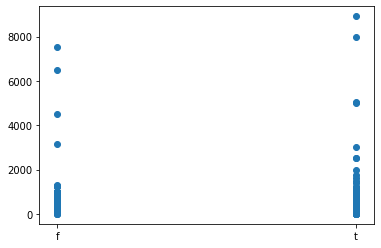

In [52]:
plt.scatter(df2["is_location_exact"], df2["price"])

In [53]:
import seaborn as sns

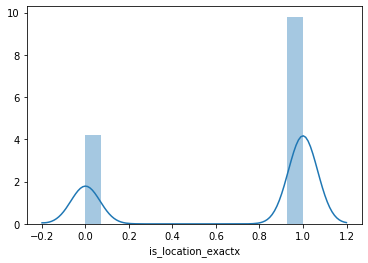

In [54]:
sns.distplot(df2.is_location_exactx.dropna())

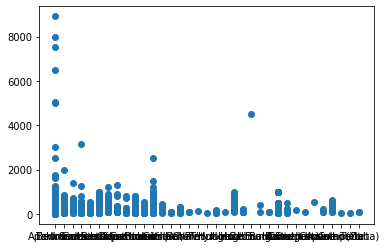

In [55]:
plt.scatter(df2["property_type"], df2["price"])

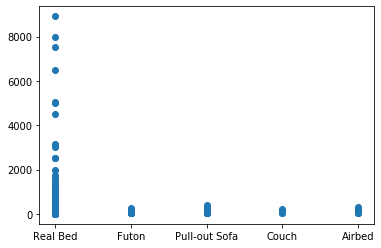

In [56]:
plt.scatter(df2["bed_type"], df2["price"])

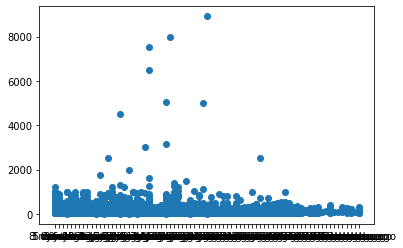

In [57]:
plt.scatter(df2["calendar_updated"], df2["price"])

In [58]:
df3 = df2[[c for c in df2 if (df2[c].dtype=="int64" or df2[c].dtype == "float64")]]

In [59]:
df3.head()

,host_id,host_since,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,reviews_per_month,is_location_exactx,property_typex,room_typex,bed_typex,calendar_updatedx,instant_bookablex,require_guest_profile_picturex,require_guest_phone_verificationx,cancellation_policyx
0,3159,39715.0,1.0,1.0,1.0,52.36575,4.94142,2,1.5,1.0,...,2.12,0,0,0,0,0,1,0,0,0
1,59484,40149.0,1.0,2.0,2.0,52.36509,4.89354,2,1.0,1.0,...,2.46,1,1,0,0,0,0,0,0,0
2,56142,40137.0,1.0,2.0,2.0,52.37297,4.88339,3,1.0,1.0,...,0.16,0,0,1,0,0,0,0,0,0
3,97647,40260.0,1.0,1.0,1.0,52.38673,4.89208,2,1.0,1.0,...,2.11,1,2,0,0,0,1,0,0,0
4,124245,40311.0,1.0,3.0,3.0,52.36719,4.89092,2,1.0,1.0,...,2.59,1,0,0,0,1,0,0,0,1


I will use this df3 now for further analysis. Showing the relation amonst the features.

In [60]:
df3 = df3.drop(["host_id", "host_since", "latitude", "longitude"], axis=1)

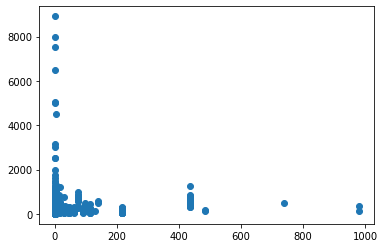

In [61]:
plt.scatter(df3["host_total_listings_count"], df3["price"])

In [62]:
df3.head()

,host_response_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,...,reviews_per_month,is_location_exactx,property_typex,room_typex,bed_typex,calendar_updatedx,instant_bookablex,require_guest_profile_picturex,require_guest_phone_verificationx,cancellation_policyx
0,1.0,1.0,1.0,2,1.5,1.0,2.0,59,200.0,60.0,...,2.12,0,0,0,0,0,1,0,0,0
1,1.0,2.0,2.0,2,1.0,1.0,1.0,80,NaN,NaN,...,2.46,1,1,0,0,0,0,0,0,0
2,1.0,2.0,2.0,3,1.0,1.0,1.0,125,300.0,40.0,...,0.16,0,0,1,0,0,0,0,0,0
3,1.0,1.0,1.0,2,1.0,1.0,1.0,150,0.0,0.0,...,2.11,1,2,0,0,0,1,0,0,0
4,1.0,3.0,3.0,2,1.0,1.0,1.0,75,NaN,NaN,...,2.59,1,0,0,0,1,0,0,0,1


In [63]:
df3.columns

Index(['host_response_rate', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
 

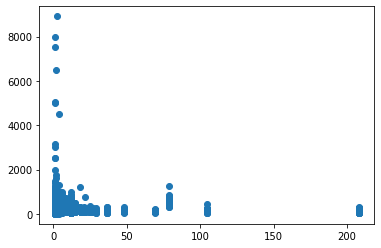

In [64]:
plt.scatter(df3["calculated_host_listings_count"], df3["price"])

This is good to have a look at the distribution distribution of the features. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A56C7E35C0>,
      dtype=object)

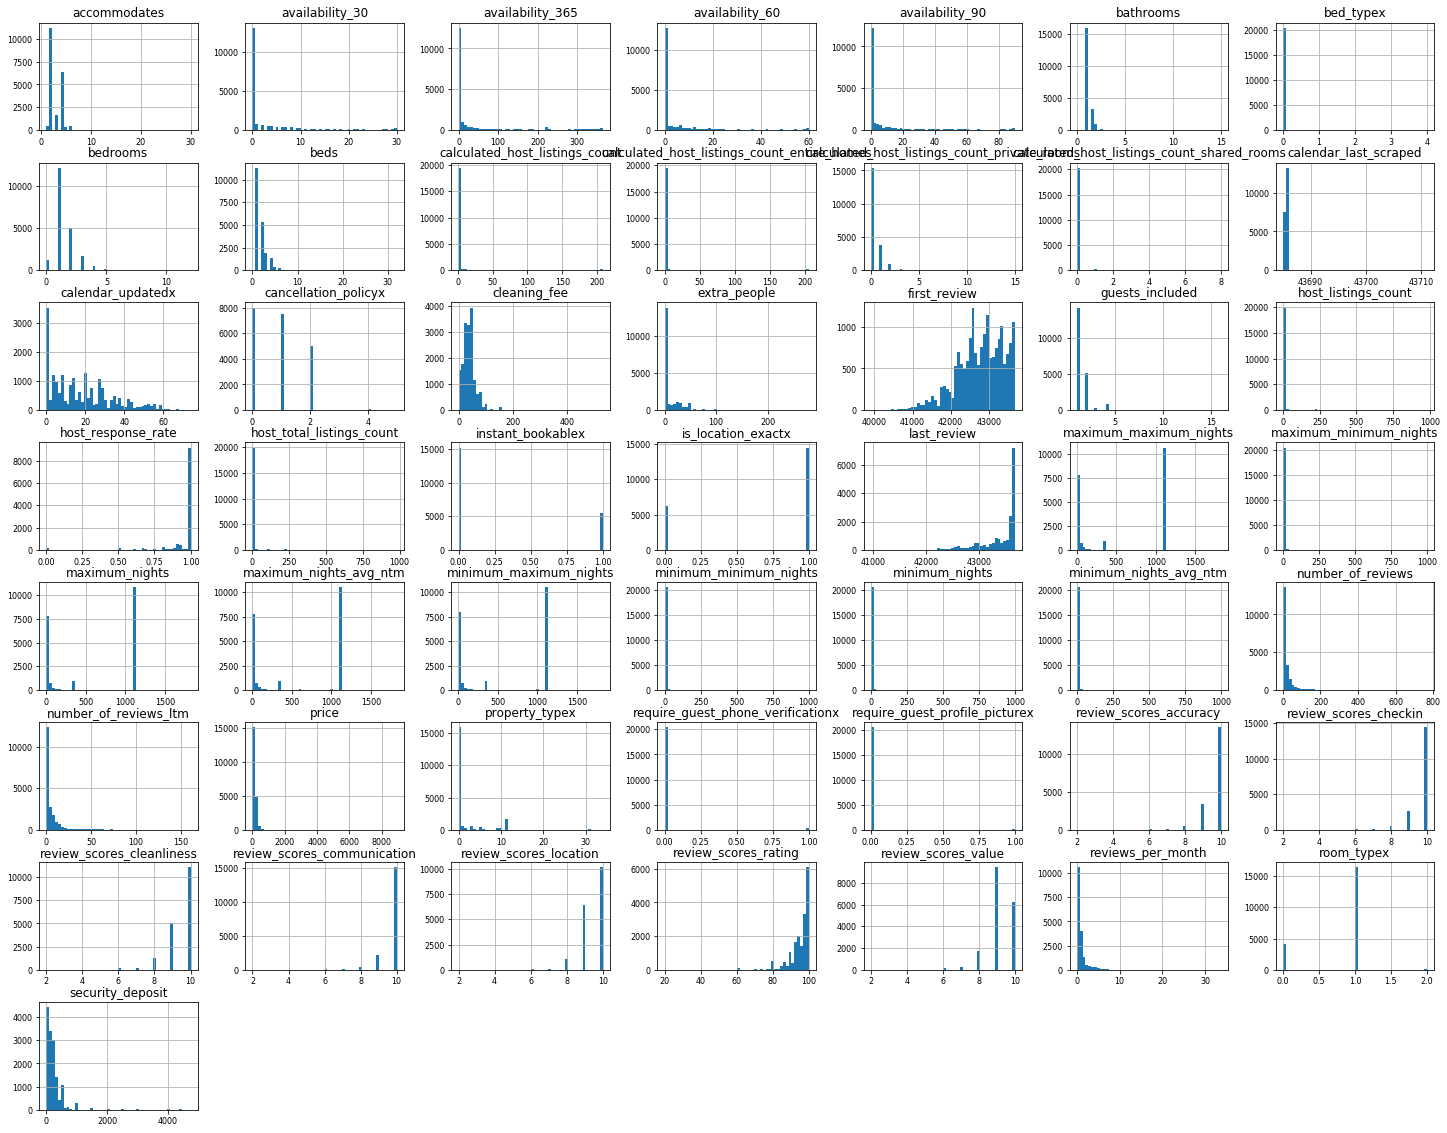

In [65]:
df3.hist(figsize=(25, 20), bins=50, xlabelsize=8, ylabelsize=8)

None of the features have normal distrobution. Lots of outliers. We need to deal with them. Now find out which features have higher correlation with 'price'. Here I found 9 best features. 'price' itself for sure. But looks like most features do not have very good correlation with 'price'.

In [66]:
df3_corr = df.corr()['price']
best_features = df3_corr[abs(df3_corr) > 0.2].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(best_features), best_features))

There is 9 strongly correlated values with SalePrice:
price            1.000000
weekly_price     0.418396
monthly_price    0.401737
square_feet      0.359093
accommodates     0.318070
cleaning_fee     0.301686
bedrooms         0.277833
beds             0.267178
bathrooms        0.201558
Name: price, dtype: float64


It is important to know the correlation amongst the features as well. Because if two features are too closely correlated, using both of them for modeling is not necessary. 

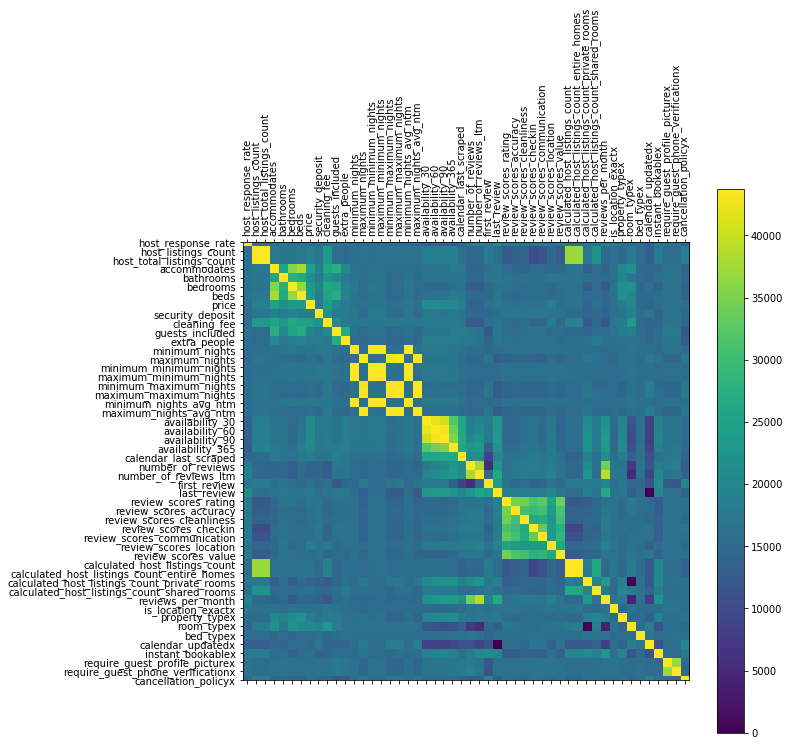

In [67]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(df, interpolation='nearest')
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical');
    plt.yticks(range(len(corr.columns)), corr.columns);

plot_corr(df3)

Looks like most featured are correlated with others. But I put all the features here and it looks too cluttered. Let's break them dowm. I also deleted some features based on the correlation.

In [68]:
df3.columns

Index(['host_response_rate', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
 

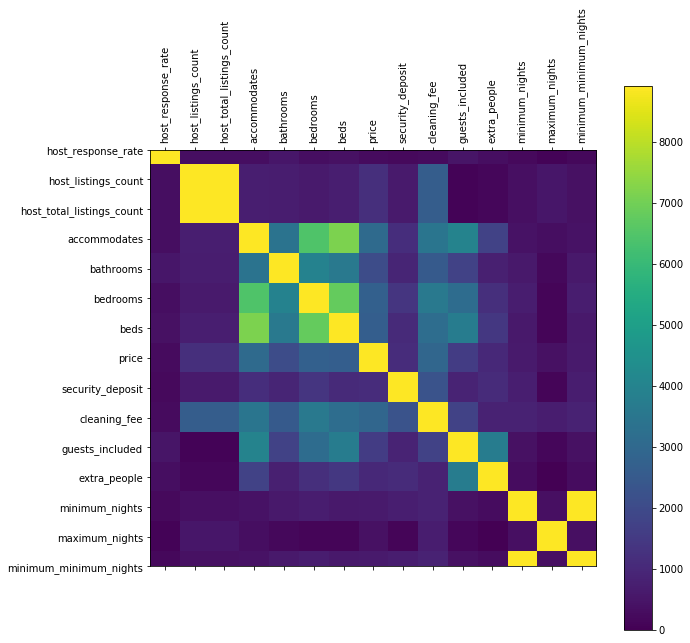

In [69]:
plot_corr(df3.iloc[:, 0:15])

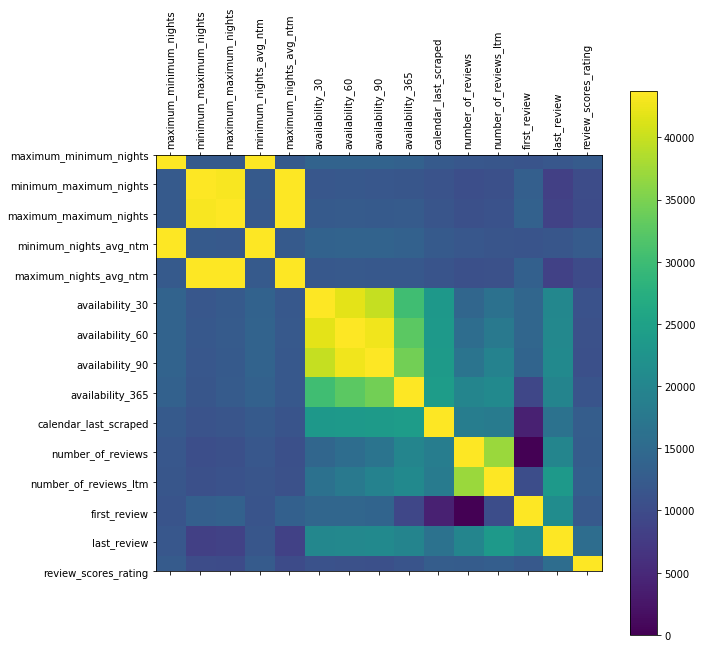

In [72]:
plot_corr(df3.iloc[:, 15:30])

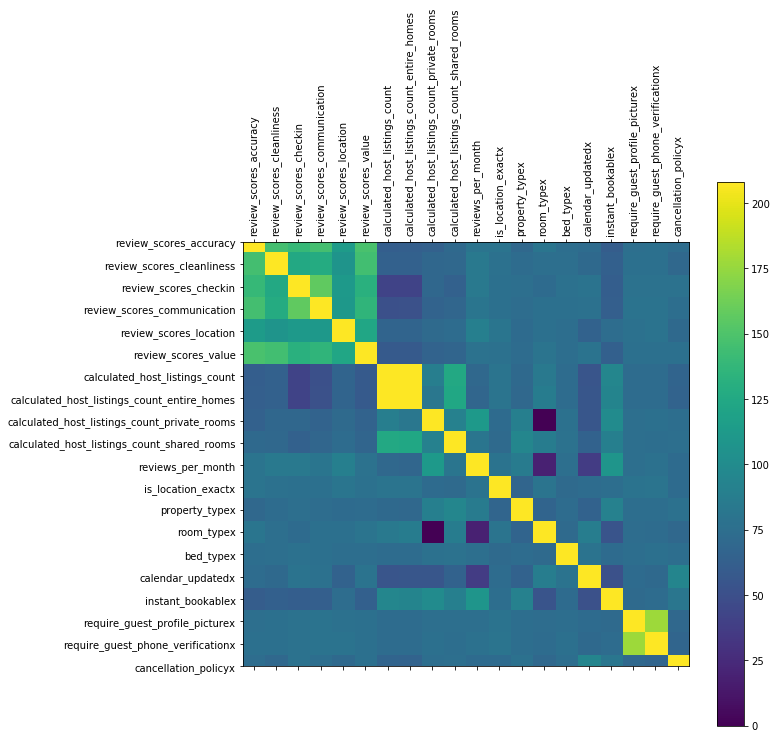

In [73]:
plot_corr(df3.iloc[:, 30:50])

In [74]:
df4 = df3.drop(['minimum_minimum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_60',
               'availability_90', 'availability_365', 'number_of_reviews_ltm', 'calendar_last_scraped', 'last_review', 
                'beds', 'guests_included', 'host_listings_count'], axis=1)

Now we have 38 features left. I wanted to see the correlation of these features with price and again deleted some features based on the result. 

In [75]:
df4.head()

,host_response_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,price,security_deposit,cleaning_fee,extra_people,minimum_nights,...,reviews_per_month,is_location_exactx,property_typex,room_typex,bed_typex,calendar_updatedx,instant_bookablex,require_guest_profile_picturex,require_guest_phone_verificationx,cancellation_policyx
0,1.0,1.0,2,1.5,1.0,59,200.0,60.0,20,3,...,2.12,0,0,0,0,0,1,0,0,0
1,1.0,2.0,2,1.0,1.0,80,NaN,NaN,0,1,...,2.46,1,1,0,0,0,0,0,0,0
2,1.0,2.0,3,1.0,1.0,125,300.0,40.0,10,14,...,0.16,0,0,1,0,0,0,0,0,0
3,1.0,1.0,2,1.0,1.0,150,0.0,0.0,0,2,...,2.11,1,2,0,0,0,1,0,0,0
4,1.0,3.0,2,1.0,1.0,75,NaN,NaN,0,2,...,2.59,1,0,0,0,1,0,0,0,1


In [76]:
df4_corr = df4.corr()['price']
best_features = df4_corr[abs(df4_corr) > 0.05].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(best_features), best_features))

There is 16 strongly correlated values with SalePrice:
price                                           1.000000
accommodates                                    0.318070
cleaning_fee                                    0.301686
bedrooms                                        0.277833
bathrooms                                       0.201558
availability_30                                 0.183866
room_typex                                      0.152347
host_total_listings_count                       0.098101
review_scores_location                          0.096498
security_deposit                                0.088905
property_typex                                  0.083850
extra_people                                    0.076617
calendar_updatedx                              -0.052327
reviews_per_month                              -0.058623
number_of_reviews                              -0.068596
calculated_host_listings_count_private_rooms   -0.070689
Name: price, dtype: float64


In [77]:
X = df4[["accommodates", "cleaning_fee", "bedrooms", "availability_30", "room_typex", "host_total_listings_count",
        "review_scores_location", "security_deposit", "property_typex", "extra_people"]]
X.head()

,accommodates,cleaning_fee,bedrooms,availability_30,room_typex,host_total_listings_count,review_scores_location,security_deposit,property_typex,extra_people
0,2,60.0,1.0,8,0,1.0,10.0,200.0,0,20
1,2,NaN,1.0,0,0,2.0,10.0,NaN,1,0
2,3,40.0,1.0,4,1,2.0,10.0,300.0,0,10
3,2,0.0,1.0,6,0,1.0,10.0,0.0,2,0
4,2,NaN,1.0,2,0,3.0,10.0,NaN,0,0


Before diving into the modeling, I checked how much nul values we have in these features. We need to find a way to fill them up.

In [79]:
for c in df4.columns:
    print("Count of {}: {}".format(c, df4[c].count()))

Count of host_response_rate: 12136
Count of host_total_listings_count: 20665
Count of accommodates: 20677
Count of bathrooms: 20671
Count of bedrooms: 20669
Count of price: 20677
Count of security_deposit: 14475
Count of cleaning_fee: 16956
Count of extra_people: 20677
Count of minimum_nights: 20677
Count of maximum_nights: 20677
Count of maximum_minimum_nights: 20677
Count of minimum_maximum_nights: 20677
Count of maximum_maximum_nights: 20677
Count of availability_30: 20677
Count of number_of_reviews: 20677
Count of first_review: 18084
Count of review_scores_rating: 17861
Count of review_scores_accuracy: 17850
Count of review_scores_cleanliness: 17852
Count of review_scores_checkin: 17840
Count of review_scores_communication: 17847
Count of review_scores_location: 17842
Count of review_scores_value: 17842
Count of calculated_host_listings_count: 20677
Count of calculated_host_listings_count_entire_homes: 20677
Count of calculated_host_listings_count_private_rooms: 20677
Count of calc

Looking at the distribution of the remaning features. As they are not normal distribution. I decided to fill the missing values with the median of each feature. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A571248E10>,
      dtype=object)

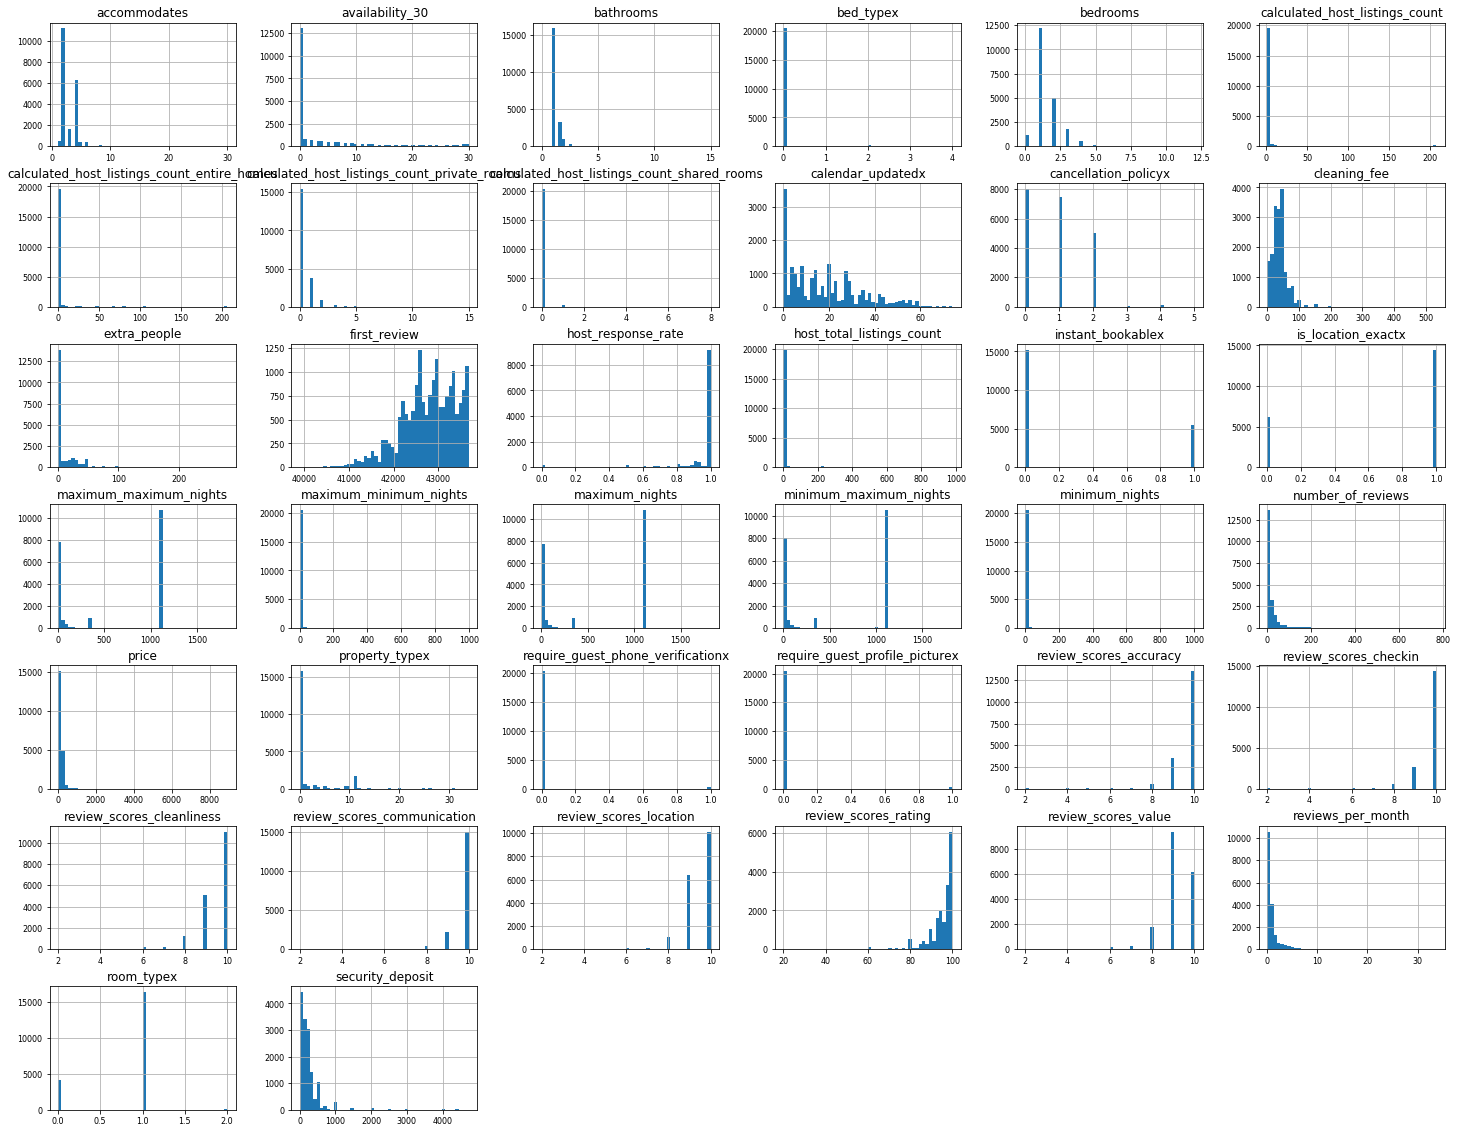

In [80]:
df4.hist(figsize=(25, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [83]:
for c in df4.columns:
        df4[c] = df4[c].fillna(df4[c].median())

In [84]:
df4.head()

,host_response_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,price,security_deposit,cleaning_fee,extra_people,minimum_nights,...,reviews_per_month,is_location_exactx,property_typex,room_typex,bed_typex,calendar_updatedx,instant_bookablex,require_guest_profile_picturex,require_guest_phone_verificationx,cancellation_policyx
0,1.0,1.0,2,1.5,1.0,59,200.0,60.0,20,3,...,2.12,0,0,0,0,0,1,0,0,0
1,1.0,2.0,2,1.0,1.0,80,150.0,40.0,0,1,...,2.46,1,1,0,0,0,0,0,0,0
2,1.0,2.0,3,1.0,1.0,125,300.0,40.0,10,14,...,0.16,0,0,1,0,0,0,0,0,0
3,1.0,1.0,2,1.0,1.0,150,0.0,0.0,0,2,...,2.11,1,2,0,0,0,1,0,0,0
4,1.0,3.0,2,1.0,1.0,75,150.0,40.0,0,2,...,2.59,1,0,0,0,1,0,0,0,1


Next I defined the features and labels. I used a support vector machine model to predict the price. I don't to have a very accurate prediction to begin with. Because the features do not correlate with the label much and also most features correlate with each other too much. Doesn't look like each individual feature can offer much information. 

In [85]:
y = df4["price"]

In [86]:
y = np.ceil(y)

In [87]:
X = df4.drop('price', axis=1)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.25)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [89]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVR
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1, 0.1,.01, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf_fit = SVR(gamma='scale', C=1.0, epsilon=0.2).fit(X_train, y_train)

In [90]:
clf_fit.score(X_test, y_test)

0.08363178067638533

I got only 8% accuracy, which is pretty bad. Let's have a closer look at the text columns

In [92]:
dftext.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,...,is_location_exact,property_type,room_type,bed_type,amenities,calendar_updated,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,...,f,Apartment,Private room,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",today,t,strict_14_with_grace_period,f,f
1,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,NaN,"No curfew, free entrance 27/7 with your own ke...",This studio/room takes entire floor and has it...,...,t,Townhouse,Private room,Real Bed,"{TV,Internet,Wifi,""Paid parking off premises"",...",today,f,strict_14_with_grace_period,f,f
2,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",NaN,NaN,The number 17 and #13 tram stop right outside ...,The apartment is about 75 meters or 800 square...,"However, our good friends who live close by ta...","The building is a quiet building, so please do...",...,f,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",today,f,strict_14_with_grace_period,f,f
3,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.","we have a canadian canoe for you as well, free...","cental station aprox. 10 minutes on foot, buss...","Your own apartment, nothing shared","As much as they want, and is possible. I speak...","All the facilities are included ( cleaning , ...",...,t,Houseboat,Private room,Real Bed,"{TV,Internet,Wifi,Breakfast,Heating,""Smoke det...",today,t,strict_14_with_grace_period,f,f
4,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,NaN,Washing and drying are for a flat fee of €15 p...,NaN,NaN,NaN,NaN,...,t,Apartment,Private room,Real Bed,"{Internet,Wifi,""Pets live on this property"",Ca...",3 days ago,f,moderate,f,f


In [93]:
dftext.columns

Index(['name', 'summary', 'space', 'description', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'picture_url', 'host_url', 'host_name', 'host_location', 'host_about',
       'host_response_time', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'is_location_exact', 'property_type',
       'room_type', 'bed_type', 'amenities', 'calendar_updated',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [97]:
dftext.iloc[:, 0:10].head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules
0,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...
1,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,NaN,"No curfew, free entrance 27/7 with your own ke...",This studio/room takes entire floor and has it...
2,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",NaN,NaN,The number 17 and #13 tram stop right outside ...,The apartment is about 75 meters or 800 square...,"However, our good friends who live close by ta...","The building is a quiet building, so please do..."
3,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.","we have a canadian canoe for you as well, free...","cental station aprox. 10 minutes on foot, buss...","Your own apartment, nothing shared","As much as they want, and is possible. I speak...","All the facilities are included ( cleaning , ..."
4,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,NaN,Washing and drying are for a flat fee of €15 p...,NaN,NaN,NaN,NaN


In [98]:
dftext.iloc[:, 10:20].head()

,picture_url,host_url,host_name,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood
0,https://a0.muscache.com/im/pictures/10272854/8...,https://www.airbnb.com/users/show/3159,Daniel,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt
1,https://a0.muscache.com/im/pictures/69979664/3...,https://www.airbnb.com/users/show/59484,Alexander,"Amsterdam, Noord-Holland, The Netherlands",Secondary phone nr. + (Phone number hidden by ...,within an hour,f,https://a0.muscache.com/im/pictures/user/579c8...,https://a0.muscache.com/im/pictures/user/579c8...,Grachtengordel
2,https://a0.muscache.com/im/pictures/138431/707...,https://www.airbnb.com/users/show/56142,Joan,"New York, New York, United States","We are a retired couple who live in NYC, and h...",within an hour,f,https://a0.muscache.com/im/users/56142/profile...,https://a0.muscache.com/im/users/56142/profile...,Grachtengordel
3,https://a0.muscache.com/im/pictures/02c2da9d-6...,https://www.airbnb.com/users/show/97647,Flip,"Amsterdam, Noord-Holland, The Netherlands","Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,t,https://a0.muscache.com/im/users/97647/profile...,https://a0.muscache.com/im/users/97647/profile...,Westelijke Eilanden
4,https://a0.muscache.com/im/pictures/160889/362...,https://www.airbnb.com/users/show/124245,Edwin,"Amsterdam, Noord-Holland, The Netherlands",Hi,within an hour,t,https://a0.muscache.com/im/pictures/9986bbdb-6...,https://a0.muscache.com/im/pictures/9986bbdb-6...,Amsterdam Centrum


In [99]:
dftext.iloc[:, 20:30].head()

,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market
0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Amsterdam
1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-Oost,Amsterdam,North Holland,1017,Amsterdam
2,"['email', 'phone', 'reviews']",t,f,"Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-West,Amsterdam,North Holland,1016,Amsterdam
3,"['email', 'phone', 'reviews', 'jumio']",t,t,"Amsterdam, North Holland, Netherlands",Westelijke Eilanden,Centrum-West,Amsterdam,North Holland,1013,Amsterdam
4,"['email', 'phone', 'reviews', 'jumio']",t,t,"Amsterdam, North Holland, Netherlands",Amsterdam Centrum,Centrum-West,Amsterdam,North Holland,1017,Amsterdam


In [100]:
dftext.iloc[:, 30:42].head()

,smart_location,is_location_exact,property_type,room_type,bed_type,amenities,calendar_updated,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,"Amsterdam, Netherlands",f,Apartment,Private room,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",today,t,strict_14_with_grace_period,f,f
1,"Amsterdam, Netherlands",t,Townhouse,Private room,Real Bed,"{TV,Internet,Wifi,""Paid parking off premises"",...",today,f,strict_14_with_grace_period,f,f
2,"Amsterdam, Netherlands",f,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",today,f,strict_14_with_grace_period,f,f
3,"Amsterdam, Netherlands",t,Houseboat,Private room,Real Bed,"{TV,Internet,Wifi,Breakfast,Heating,""Smoke det...",today,t,strict_14_with_grace_period,f,f
4,"Amsterdam, Netherlands",t,Apartment,Private room,Real Bed,"{Internet,Wifi,""Pets live on this property"",Ca...",3 days ago,f,moderate,f,f


I need to have a closer look at the 'price' column itself. Looks like it is sharply right skewed. Have some outliers in the far right end. Excluding them should help the prediction a bit 

In [101]:
df4['price'].describe()

count    20677.000000
mean       159.078686
std        162.464267
min          0.000000
25%         99.000000
50%        130.000000
75%        180.000000
max       8915.000000
Name: price, dtype: float64

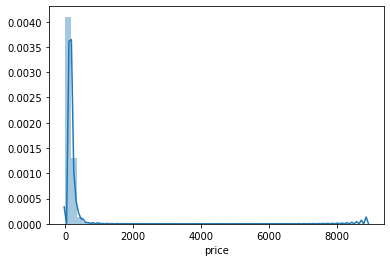

In [102]:
sns.distplot(df4['price'])

In [104]:
df4.price.sort_values(ascending=False)

3640     8915
122      8000
18789    7550
17201    6500
17245    5040
11798    5000
2917     4500
9105     3142
16709    3000
11689    2500
5997     2500
16862    2000
263      1750
9556     1600
10124    1500
8919     1390
18538    1285
17586    1272
14189    1250
16447    1230
18396    1200
8828     1200
2471     1195
3010     1119
14669    1050
14994    1025
11606    1009
20543    1000
15960    1000
10794    1000
         ... 
8583       25
19025      25
13637      25
18242      25
19236      25
10549      24
17462      24
6961       23
9977       23
18289      20
18296      20
18291      20
18290      20
17097      20
9710       20
4697       20
18287      20
18286      20
18285      20
18288      20
6041       19
19863      15
3447       14
2290       12
18228      10
19772       9
3705        9
16843       9
18612       9
12535       0
Name: price, Length: 20677, dtype: int64

I am excluding some rows with some outliers in the 'price' distribution. And repeating the model again.

In [105]:
df5 = df4[df['price']<3200]

In [107]:
len(df5)

20670

In [109]:
y = df5["price"]

In [110]:
y = np.ceil(y)

In [113]:
X = df5.drop('price', axis=1)

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.25)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [115]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVR
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1, 0.1,.01, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf_fit = SVR(gamma='scale', C=1.0, epsilon=0.2).fit(X_train, y_train)

In [116]:
clf_fit.score(X_test, y_test)

0.24810992882326732

In [121]:
y_pred = clf_fit.predict(X_test)
cost = np.ceil(np.mean((np.square(y_test-y_pred)))/2)
cost

3557.0

The prediction accuracy seems to be 24.8%, far better than 8%. But having a look at the root mean square error, it seems too high.

In [134]:
df5 = df4[df['price']<400]

In [135]:
len(df5)

20048

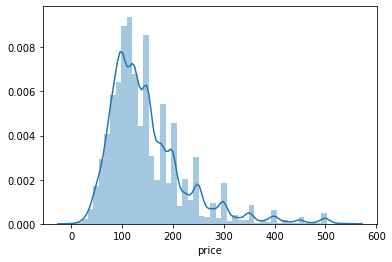

In [136]:
sns.distplot(y)

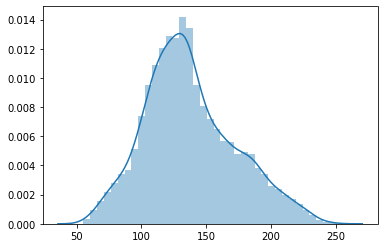

In [137]:
sns.distplot(y_pred)

In [138]:
y = df5["price"]

In [139]:
y = np.ceil(y)

In [140]:
X = df5.drop('price', axis=1)

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.25)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [142]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVR
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1, 0.1,.01, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf_fit = SVR(gamma='scale', C=1.0, epsilon=0.2).fit(X_train, y_train)

In [143]:
clf_fit.score(X_test, y_test)

0.34725113631707316

In [144]:
y_pred = clf_fit.predict(X_test)
cost = np.ceil(np.sum((np.square(y_test-y_pred)))/(2*len(y_test)))
cost

1424.0

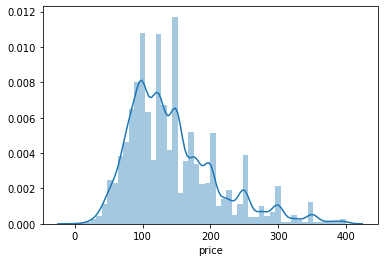

In [145]:
sns.distplot(df5['price'])

In [147]:
df5["pricegrp"] = pd.cut(df5.price, [0, 50, 100, 150, 200, 
                                        250, 300, 350, 400])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [219]:
df5['price'] = df4['price']

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [220]:
df5['price'] = df5.price.apply(lambda val: np.ceil(val/50)*50)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [221]:
df5['price']

0        100.0
1        100.0
2        150.0
3        150.0
4        100.0
5        100.0
6        250.0
7        150.0
8        200.0
9        250.0
10       100.0
11       350.0
12       250.0
13       150.0
14       150.0
15       350.0
16       250.0
17       150.0
18       150.0
19       150.0
20       100.0
21       100.0
22       100.0
23       100.0
24       100.0
25       100.0
26       250.0
27       250.0
28       200.0
29       100.0
         ...  
20646    100.0
20647    100.0
20648    200.0
20649    150.0
20650    100.0
20652    100.0
20653    200.0
20654    400.0
20655    150.0
20656     50.0
20657    100.0
20658    150.0
20659    350.0
20660    100.0
20661    200.0
20662    150.0
20663    100.0
20664    300.0
20665    150.0
20666    150.0
20667     50.0
20668    250.0
20669    100.0
20670    200.0
20671    400.0
20672     50.0
20673    200.0
20674    100.0
20675    250.0
20676    100.0
Name: price, Length: 20048, dtype: float64

In [222]:
y = df5["price"]

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.25)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [224]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVR
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1, 0.1,.01, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf_fit = SVR(gamma='scale', C=1.0, epsilon=0.2).fit(X_train, y_train)

In [225]:
clf_fit.score(X_test, y_test)

0.3250495543216001

In [234]:
dftext = dftext.drop(['picture_url', 'host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
            'host_verifications'], axis=1)
dftext.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_location,host_about,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,is_location_exact,property_type,room_type,bed_type,amenities,calendar_updated,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,t,t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Amsterdam,"Amsterdam, Netherlands",f,Apartment,Private room,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",today,t,strict_14_with_grace_period,f,f
1,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,NaN,"No curfew, free entrance 27/7 with your own ke...",This studio/room takes entire floor and has it...,"Amsterdam, Noord-Holland, The Netherlands",Secondary phone nr. + (Phone number hidden by ...,within an hour,f,t,f,"Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-Oost,Amsterdam,North Holland,1017,Amsterdam,"Amsterdam, Netherlands",t,Townhouse,Private room,Real Bed,"{TV,Internet,Wifi,""Paid parking off premises"",...",today,f,strict_14_with_grace_period,f,f
2,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",NaN,NaN,The number 17 and #13 tram stop right outside ...,The apartment is about 75 meters or 800 square...,"However, our good friends who live close by ta...","The building is a quiet building, so please do...","New York, New York, United States","We are a retired couple who live in NYC, and h...",within an hour,f,t,f,"Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-West,Amsterdam,North Holland,1016,Amsterdam,"Amsterdam, Netherlands",f,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",today,f,strict_14_with_grace_period,f,f
3,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.","we have a canadian canoe for you as well, free...","cental station aprox. 10 minutes on foot, buss...","Your own apartment, nothing shared","As much as they want, and is possible. I speak...","All the facilities are included ( cleaning , ...","Amsterdam, Noord-Holland, The Netherlands","Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,t,t,t,"Amsterdam, North Holland, Netherlands",Westelijke Eilanden,Centrum-West,Amsterdam,North Holland,1013,Amsterdam,"Amsterdam, Netherlands",t,Houseboat,Private room,Real Bed,"{TV,Internet,Wifi,Breakfast,Heating,""Smoke det...",today,t,strict_14_with_grace_period,f,f
4,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,NaN,Washing and drying are for a flat fee of €15 p...,NaN,NaN,NaN,NaN,"Amsterdam, Noord-Holland, The Netherlands",Hi,within an hour,t,t,t,"Amsterdam, North 

In [235]:
pd.set_option('display.max_columns', 100)

In [236]:
dftext.columns

Index(['name', 'summary', 'space', 'description', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'host_location', 'host_about', 'host_response_time',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities',
       'calendar_updated', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [237]:
dftext.shape

(20677, 34)

In [239]:
for col in dftext.columns:
    dftext[col] = dftext[col].fillna('Missing')

In [240]:
dftext.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_location,host_about,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,is_location_exact,property_type,room_type,bed_type,amenities,calendar_updated,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,Missing,Missing,Please: - Leave your shoes in the entrance - ...,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,t,t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,Missing,Amsterdam,"Amsterdam, Netherlands",f,Apartment,Private room,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",today,t,strict_14_with_grace_period,f,f
1,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,Missing,"No curfew, free entrance 27/7 with your own ke...",This studio/room takes entire floor and has it...,"Amsterdam, Noord-Holland, The Netherlands",Secondary phone nr. + (Phone number hidden by ...,within an hour,f,t,f,"Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-Oost,Amsterdam,North Holland,1017,Amsterdam,"Amsterdam, Netherlands",t,Townhouse,Private room,Real Bed,"{TV,Internet,Wifi,""Paid parking off premises"",...",today,f,strict_14_with_grace_period,f,f
2,Lovely apt in City Centre (w.lift) near Jordaan,Missing,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",Missing,Missing,The number 17 and #13 tram stop right outside ...,The apartment is about 75 meters or 800 square...,"However, our good friends who live close by ta...","The building is a quiet building, so please do...","New York, New York, United States","We are a retired couple who live in NYC, and h...",within an hour,f,t,f,"Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-West,Amsterdam,North Holland,1016,Amsterdam,"Amsterdam, Netherlands",f,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",today,f,strict_14_with_grace_period,f,f
3,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.","we have a canadian canoe for you as well, free...","cental station aprox. 10 minutes on foot, buss...","Your own apartment, nothing shared","As much as they want, and is possible. I speak...","All the facilities are included ( cleaning , ...","Amsterdam, Noord-Holland, The Netherlands","Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,t,t,t,"Amsterdam, North Holland, Netherlands",Westelijke Eilanden,Centrum-West,Amsterdam,North Holland,1013,Amsterdam,"Amsterdam, Netherlands",t,Houseboat,Private room,Real Bed,"{TV,Internet,Wifi,Breakfast,Heating,""Smoke det...",today,t,strict_14_with_grace_period,f,f
4,Comfortable double room,Missing,In a monumental house right in the center of A...,In a monumental house right in the center of A...,Missing,Washing and drying are for a flat fee of €15 p...,Missing,Missing,Missing,Missing,"Amsterdam, Noord-Holland, The Net

In [241]:
dftext['total'] = ''
for c in dftext.columns:
    dftext['total'] += dftext[c]
dftext.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_location,host_about,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,is_location_exact,property_type,room_type,bed_type,amenities,calendar_updated,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,total
0,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,Missing,Missing,Please: - Leave your shoes in the entrance - ...,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,t,t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,Missing,Amsterdam,"Amsterdam, Netherlands",f,Apartment,Private room,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",today,t,strict_14_with_grace_period,f,f,Quiet Garden View Room & Super Fast WiFiQuiet ...
1,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,Missing,"No curfew, free entrance 27/7 with your own ke...",This studio/room takes entire floor and has it...,"Amsterdam, Noord-Holland, The Netherlands",Secondary phone nr. + (Phone number hidden by ...,within an hour,f,t,f,"Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-Oost,Amsterdam,North Holland,1017,Amsterdam,"Amsterdam, Netherlands",t,Townhouse,Private room,Real Bed,"{TV,Internet,Wifi,""Paid parking off premises"",...",today,f,strict_14_with_grace_period,f,f,Studio with private bathroom in the centre 1Co...
2,Lovely apt in City Centre (w.lift) near Jordaan,Missing,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",Missing,Missing,The number 17 and #13 tram stop right outside ...,The apartment is about 75 meters or 800 square...,"However, our good friends who live close by ta...","The building is a quiet building, so please do...","New York, New York, United States","We are a retired couple who live in NYC, and h...",within an hour,f,t,f,"Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-West,Amsterdam,North Holland,1016,Amsterdam,"Amsterdam, Netherlands",f,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",today,f,strict_14_with_grace_period,f,f,Lovely apt in City Centre (w.lift) near Jordaa...
3,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.","we have a canadian canoe for you as well, free...","cental station aprox. 10 minutes on foot, buss...","Your own apartment, nothing shared","As much as they want, and is possible. I speak...","All the facilities are included ( cleaning , ...","Amsterdam, Noord-Holland, The Netherlands","Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,t,t,t,"Amsterdam, North Holland, Netherlands",Westelijke Eilanden,Centrum-West,Amsterdam,North Holland,1013,Amsterdam,"Amsterdam, Netherlands",t,Houseboat,Private room,Real Bed,"{TV,Internet,Wifi,Breakfast,Heating,""Smoke det...",today,t,strict_14_with_grace_period,f,f,"Romantic, stylish B&B houseboat in canal distr..."
4,Comfortable double room,Missing,In a monumental 

In [247]:
dftext.to_excel('dftext1.xlsx', 'utf-8')

In [248]:
dftext['price']=df5['price']

In [249]:
dftext['price']

0        100.0
1        100.0
2        150.0
3        150.0
4        100.0
5        100.0
6        250.0
7        150.0
8        200.0
9        250.0
10       100.0
11       350.0
12       250.0
13       150.0
14       150.0
15       350.0
16       250.0
17       150.0
18       150.0
19       150.0
20       100.0
21       100.0
22       100.0
23       100.0
24       100.0
25       100.0
26       250.0
27       250.0
28       200.0
29       100.0
         ...  
20647    100.0
20648    200.0
20649    150.0
20650    100.0
20651      NaN
20652    100.0
20653    200.0
20654    400.0
20655    150.0
20656     50.0
20657    100.0
20658    150.0
20659    350.0
20660    100.0
20661    200.0
20662    150.0
20663    100.0
20664    300.0
20665    150.0
20666    150.0
20667     50.0
20668    250.0
20669    100.0
20670    200.0
20671    400.0
20672     50.0
20673    200.0
20674    100.0
20675    250.0
20676    100.0
Name: price, Length: 20677, dtype: float64

In [254]:
dftext.to_excel('dftext1.xlsx')